In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных 

In [47]:
## Загрузка данных


path_train = '/Users/vasevooo/projects/house_prices/housing_kaggle/data/train.csv'
path_test = '/Users/vasevooo/projects/house_prices/housing_kaggle/data/test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train.head()
df_train.shape


(1460, 81)

In [48]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
## Объединение df_train and df_test, взял натуральный логарифм таргета

df = pd.concat([df_train.drop('SalePrice', axis=1), df_test], axis=0)
df.reset_index(inplace=True, drop=True)
y = np.log(df_train['SalePrice'])
df.head(5)

ind_train = df_train.shape[0]
ind_test = df_test.shape[0]

ind_train, ind_test


(1460, 1459)

In [50]:
df.shape
# df.info()

(2919, 80)

In [51]:
df['LotFrontage'].value_counts()
# df['MasVnrArea'].value_counts()
# df['GarageYrBlt'].value_counts()

df['LotFrontage'].isna().sum()/len(df['LotFrontage'])

0.16649537512846865

In [52]:
df['LotFrontage'].describe()

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

## Basic EDA

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_2938/1255858044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


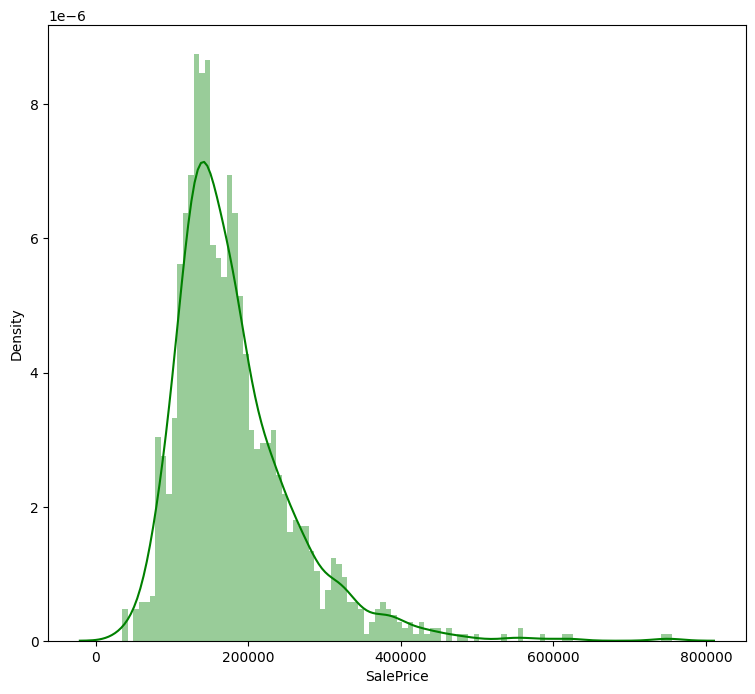

In [53]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [54]:
list(set(df_train.dtypes.tolist()))
df_num = df_train.select_dtypes(include = ['float64', 'int64']).drop('Id', axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


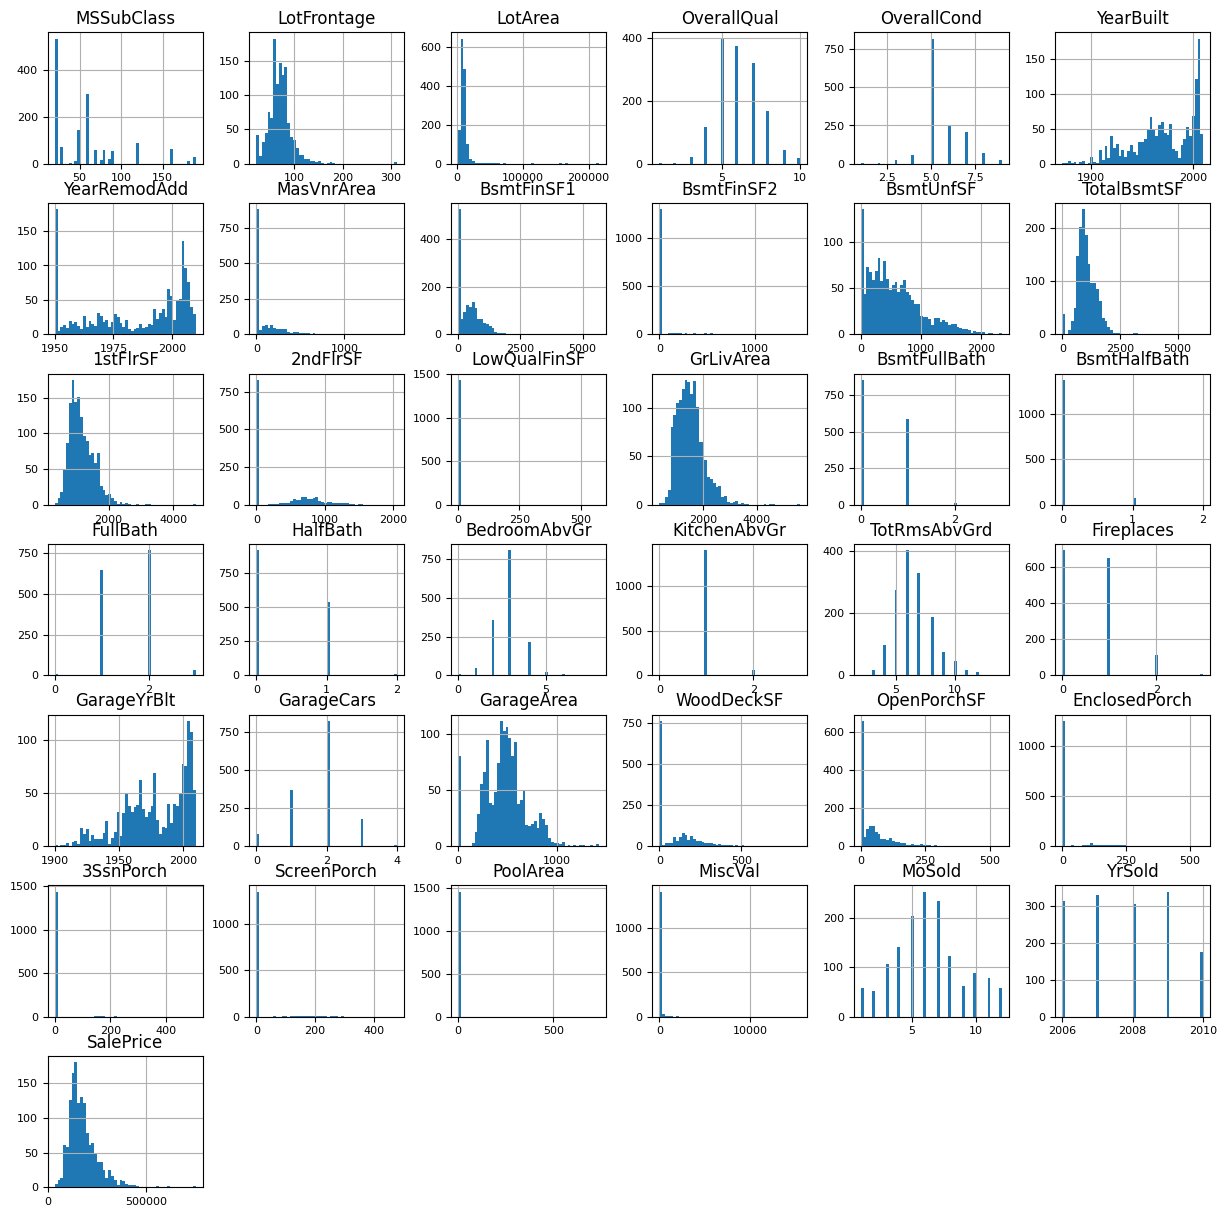

In [55]:
df_num.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8);

In [56]:
missing_values = pd.DataFrame(df.isnull().mean().round(4).mul(100).sort_values(ascending=False))
missing_values.head(15)

,0
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
MasVnrType,60.50
FireplaceQu,48.65
LotFrontage,16.65
GarageQual,5.45
GarageCond,5.45
GarageYrBlt,5.45


## Обработка категориальных фичей
Вася

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [58]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [59]:
## missing values in cat feautures

missing_values_cat = pd.DataFrame(df_cat.isnull().mean().round(4).mul(100).sort_values(ascending=False))
missing_values_cat.head(15)


## Заполнил все NaN 'Lack_F', так как в данном случае NaN у нас - это не пустое поле, а отсутствие признака
df_cat.fillna('Lack_F', inplace=True)

In [60]:
df_cat.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      17
Exterior1st      16
SaleType         10
Condition1        9
Condition2        8
RoofMatl          8
Functional        8
HouseStyle        8
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Electrical        6
Foundation        6
Heating           6
FireplaceQu       6
GarageQual        6
GarageCond        6
MSZoning          6
SaleCondition     6
RoofStyle         6
ExterCond         5
BldgType          5
MiscFeature       5
Fence             5
LotConfig         5
KitchenQual       5
BsmtQual          5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
MasVnrType        4
ExterQual         4
GarageFinish      4
LandContour       4
LotShape          4
PoolQC            4
Utilities         3
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
dtype: int64

In [61]:
selected_columns = df_cat.loc[:, df_cat.nunique() >= 5]

# Хочу заменить значения на 'other' у колонок с выбранным threshold. Далее можно будет подумать над выбором значения и подбирать для каждой колонки.
thresholds = selected_columns.apply(lambda x: x.count() * 0.0)

## итерируюсь по колонкам и заменяю значения меньше threshold на 'other'

for column, threshold in zip(selected_columns.columns, thresholds):
    counts = selected_columns[column].value_counts()
    to_replace = counts[counts < threshold].index
    selected_columns[column] = selected_columns[column].replace(to_replace, 'other')


## вставляем отобранные колонки в df_cat

df_cat[selected_columns.columns] = selected_columns


/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_2938/562608944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = selected_columns[column].replace(to_replace, 'other')
/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_2938/562608944.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = selected_columns[column].replace(to_replace, 'other')
/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_2938/562608944.py:11: SettingWithCopy

In [62]:
df_cat.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      17
Exterior1st      16
SaleType         10
Condition1        9
Condition2        8
RoofMatl          8
Functional        8
HouseStyle        8
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Electrical        6
Foundation        6
Heating           6
FireplaceQu       6
GarageQual        6
GarageCond        6
MSZoning          6
SaleCondition     6
RoofStyle         6
ExterCond         5
BldgType          5
MiscFeature       5
Fence             5
LotConfig         5
KitchenQual       5
BsmtQual          5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
MasVnrType        4
ExterQual         4
GarageFinish      4
LandContour       4
LotShape          4
PoolQC            4
Utilities         3
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
dtype: int64

In [63]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Lack_F,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
1,RL,Pave,Lack_F,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
2,RL,Pave,Lack_F,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
3,RL,Pave,Lack_F,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Abnorml
4,RL,Pave,Lack_F,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal


In [64]:
## Попробую использовать target encoder для всех фичей

from category_encoders import TargetEncoder
te = TargetEncoder()

## Обучаем target encoding
te.fit(df_cat.loc[0:ind_test,:], y)

## Собираем df с target encoding
df_cat_te = pd.concat([te.transform(df_cat.loc[0:ind_test,:]), te.transform(te.transform(df_cat.loc[ind_train:,:]))], axis=0)


df_cat_te.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,12.027165,12.024639,12.024378,12.023146,12.023723,12.024108,12.023840,12.023721,12.024243,12.023091,...,12.025655,12.024084,12.024154,12.025981,12.024790,12.023226,12.024790,12.024449,12.025056,12.025457
std,0.105074,0.003311,0.044805,0.081549,0.043542,0.000470,0.042667,0.008485,0.193253,0.050890,...,0.161285,0.174253,0.102613,0.101436,0.084236,0.003784,0.055988,0.019754,0.094274,0.098976
min,11.692893,11.953506,11.689986,11.936094,11.813595,11.998983,12.001900,12.020565,11.536040,11.757933,...,11.493065,11.493065,11.493065,11.493065,11.578347,12.022115,11.791978,11.876505,11.845353,11.788846
25%,12.024051,12.024051,12.024051,11.936094,12.022694,12.024051,12.001900,12.020565,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.022115,12.024051,12.024051,11.991061,12.005034
50%,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
75%,12.085885,12.025522,12.037675,12.024051,12.024051,12.024183,12.024051,12.024051,12.085912,12.042916,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.024051,12.058599,12.030112,12.024051,12.024051
max,12.244171,12.025522,12.037675,12.286332,12.248102,12.024183,12.249672,12.076286,12.617426,12.125676,...,12.374528,12.320811,12.093508,12.070483,12.059895,12.154581,12.058599,12.076766,12.459356,12.447465


In [65]:
## Заменяем в нашем df категориальные фичи на фичи, которые прошли encoding

df[df_cat_te.columns] = df_cat_te

In [66]:
df.shape

(2919, 80)

In [67]:
df.describe().round(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2433.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,12.03,69.31,10168.11,12.02,12.02,12.02,12.02,12.02,...,16.06,2.25,12.02,12.02,12.02,50.83,6.21,2007.79,12.03,12.03
std,842.79,42.52,0.11,23.34,7887.00,0.00,0.04,0.08,0.04,0.00,...,56.18,35.66,0.00,0.06,0.02,567.40,2.71,1.31,0.09,0.10
min,1.00,20.00,11.69,21.00,1300.00,11.95,11.69,11.94,11.81,12.00,...,0.00,0.00,12.02,11.79,11.88,0.00,1.00,2006.00,11.85,11.79
25%,730.50,20.00,12.02,59.00,7478.00,12.02,12.02,11.94,12.02,12.02,...,0.00,0.00,12.02,12.02,12.02,0.00,4.00,2007.00,11.99,12.01
50%,1460.00,50.00,12.02,68.00,9453.00,12.02,12.02,12.02,12.02,12.02,...,0.00,0.00,12.02,12.02,12.02,0.00,6.00,2008.00,12.02,12.02
75%,2189.50,70.00,12.09,80.00,11570.00,12.03,12.04,12.02,12.02,12.02,...,0.00,0.00,12.02,12.06,12.03,0.00,8.00,2009.00,12.02,12.02
max,2919.00,190.00,12.24,313.00,215245.00,12.03,12.04,12.29,12.25,12.02,...,576.00,800.00,12.15,12.06,12.08,17000.00,12.00,2010.00,12.46,12.45


## Обработка числовых фичей 
Вика

In [68]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

df.shape

(2919, 80)

In [69]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

In [70]:
df['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    2744
1.0     171
2.0       4
Name: count, dtype: int64

## Подготовка к обучению модели

In [71]:
## Scaling of our data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df.loc[:, df.columns != 'Id']), columns=df.columns[1:])
df_scaled.describe().round(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.87,-3.18,-2.27,-1.12,-21.48,-7.46,-1.07,-4.83,-53.48,-0.51,...,-0.29,-0.06,-0.29,-4.16,-7.49,-0.09,-1.92,-1.36,-1.91,-2.39
25%,-0.87,-0.03,-0.44,-0.34,-0.18,-0.01,-1.07,-0.02,-0.12,-0.51,...,-0.29,-0.06,-0.29,-0.01,-0.02,-0.09,-0.82,-0.60,-0.36,-0.21
50%,-0.17,-0.03,0.00,-0.09,-0.18,-0.01,0.01,0.01,-0.12,0.00,...,-0.29,-0.06,0.22,-0.01,-0.02,-0.09,-0.08,0.16,-0.01,-0.01
75%,0.30,0.56,0.41,0.18,0.27,0.30,0.01,0.01,0.16,0.00,...,-0.29,-0.06,0.22,0.60,0.29,-0.09,0.66,0.92,-0.01,-0.01
max,3.13,2.07,11.44,26.01,0.27,0.30,3.23,5.15,0.16,5.29,...,9.97,22.37,34.71,0.60,2.65,29.88,2.13,1.68,4.61,4.26


In [72]:
## если скейэлить только numeric

# df_numeric_scaled = pd.DataFrame(ss.fit_transform(df[df_num.drop('SalePrice', axis=1).columns]), 
#                                  columns = df_num.drop('SalePrice', axis=1).columns)

# df_scaled = pd.concat([df_numeric_scaled,df_cat_te], axis=1)

# df_scaled


In [73]:
### Разбиваем наш df на train and test

df_train = pd.concat([df_scaled.loc[0:ind_test,:], y], axis=1)
df_test = pd.concat([df['Id'][ind_train:], df_scaled.loc[ind_train:,:]], axis=1)

df_train.shape, df_test.shape

# df_test.head(5)

# df_train.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/df_train_clean.csv', index=False)
# df_test.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/df_test_clean.csv', index=False)

((1460, 80), (1459, 80))

In [74]:
df_scaled.describe().round(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,...,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000,2919.00000
mean,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,...,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
std,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,...,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017,1.00017
min,-0.87362,-3.18185,-2.26695,-1.12459,-21.48422,-7.46450,-1.06767,-4.82668,-53.48250,-0.51431,...,-0.28594,-0.06315,-0.29358,-4.15896,-7.49068,-0.08959,-1.92060,-1.36357,-1.90651,-2.39100
25%,-0.87362,-0.02964,-0.43671,-0.34114,-0.17760,-0.00729,-1.06767,-0.02363,-0.12222,-0.51431,...,-0.28594,-0.06315,-0.29358,-0.01320,-0.02014,-0.08959,-0.81534,-0.60296,-0.36066,-0.20638
50%,-0.16791,-0.02964,0.00000,-0.09069,-0.17760,-0.00729,0.01110,0.00754,-0.12222,0.00495,...,-0.28594,-0.06315,0.21796,-0.01320,-0.02014,-0.08959,-0.07851,0.15765,-0.01066,-0.01421
75%,0.30257,0.55894,0.40801,0.17778,0.26687,0.29684,0.01110,0.00754,0.15888,0.00495,...,-0.28594,-0.06315,0.21796,0.60396,0.28676,-0.08959,0.65833,0.91825,-0.01066,-0.01421
max,3.12541,2.06562,11.43637,26.00635,0.26687,0.29684,3.22790,5.15405,0.15888,5.29378,...,9.96778,22.37231,34.71498,0.60396,2.64896,29.87665,2.13201,1.67886,4.60759,4.26446


In [75]:
df_train.describe().round(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,-0.0,0.0,0.0,0.0,0.2,0.0,-0.0,-0.0,0.1,-0.0,...,0.0,-0.2,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,12.0
std,1.0,1.4,1.0,1.3,1.4,1.4,1.4,1.4,1.4,1.4,...,1.1,1.4,1.4,1.4,0.9,1.0,1.0,1.4,1.4,0.4
min,-0.9,-3.2,-2.3,-1.1,-21.5,-7.5,-1.1,-4.8,-53.5,-0.5,...,-0.1,-0.3,-4.2,-7.5,-0.1,-1.9,-1.4,-1.9,-2.4,10.5
25%,-0.9,0.6,-0.4,-0.3,0.3,0.3,-1.1,-0.0,0.2,-0.5,...,-0.1,-0.3,0.6,0.3,-0.1,-0.4,-0.6,-0.4,-0.2,11.8
50%,-0.2,0.6,0.0,-0.1,0.3,0.3,-1.1,-0.0,0.2,-0.5,...,-0.1,-0.3,0.6,0.3,-0.1,-0.1,0.2,-0.4,-0.2,12.0
75%,0.3,0.6,0.5,0.2,0.3,0.3,1.7,-0.0,0.2,0.1,...,-0.1,-0.3,0.6,0.3,-0.1,0.7,0.9,-0.4,-0.2,12.3
max,3.1,2.1,11.4,26.0,0.3,0.3,3.2,5.2,0.2,5.3,...,20.6,34.7,0.6,2.6,27.2,2.1,1.7,4.6,4.3,13.5


In [76]:
df_test.describe().round(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,...,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0,1459.0
mean,2190.0,0.0,-0.0,-0.0,-0.0,-0.2,-0.0,0.0,0.0,-0.1,...,0.0,-0.0,0.2,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,421.3,1.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,...,1.0,0.9,0.0,0.0,0.0,1.1,1.0,1.0,0.0,0.0
min,1461.0,-0.9,-0.0,-2.3,-1.1,-0.2,-0.0,0.0,0.0,-0.1,...,-0.3,-0.1,0.2,-0.0,-0.0,-0.1,-1.9,-1.4,-0.0,-0.0
25%,1825.5,-0.9,-0.0,-0.4,-0.4,-0.2,-0.0,0.0,0.0,-0.1,...,-0.3,-0.1,0.2,-0.0,-0.0,-0.1,-0.8,-0.6,-0.0,-0.0
50%,2190.0,-0.2,-0.0,0.0,-0.1,-0.2,-0.0,0.0,0.0,-0.1,...,-0.3,-0.1,0.2,-0.0,-0.0,-0.1,-0.1,0.2,-0.0,-0.0
75%,2554.5,0.3,-0.0,0.4,0.2,-0.2,-0.0,0.0,0.0,-0.1,...,-0.3,-0.1,0.2,-0.0,-0.0,-0.1,0.7,0.9,-0.0,-0.0
max,2919.0,3.1,-0.0,6.1,5.9,-0.2,-0.0,0.0,0.0,-0.1,...,10.0,22.4,0.2,-0.0,-0.0,29.9,2.1,1.7,-0.0,-0.0


In [77]:
from sklearn.model_selection import train_test_split

x = df_train

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
x_train.shape,  y_train.shape, x_valid.shape, y_valid.shape

((1168, 80), (1168,), (292, 80), (292,))

## Обучение модели

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [80]:
rf = RandomForestRegressor()
lr = LinearRegression()

In [81]:
rf.fit(x_train, y_train)
lr.fit(x_train, y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_valid, lr.predict(x_valid), squared=False)
mse_rf = mean_squared_error(y_valid, rf.predict(x_valid), squared=False)

mse_rf.round(3), mse_lr.round(3)


print("train acc lr:", mean_squared_error(y_train, lr.predict(x_train), squared=False))
print("valid acc lr:", mean_squared_error(y_valid, lr.predict(x_valid), squared=False))

print("train acc rf:", mean_squared_error(y_train, rf.predict(x_train), squared=False))
print("valid acc rf:", mean_squared_error(y_valid, rf.predict(x_valid), squared=False))

train acc lr: 1.3493938899633486e-15
valid acc lr: 1.1622345809985416e-15
train acc rf: 0.0059083295228627986
valid acc rf: 0.022149034651562188


In [83]:
y_pred_test = lr.predict(df_test.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- SalePrice


In [ ]:
# submission_lr = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
# submission_lr.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_lr.csv', index=False)

In [84]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose = False, iterations = 50, l2_leaf_reg=3, learning_rate = 0.1, depth = 3, loss_function = 'RMSE')

cb.fit(x_train, y_train.ravel())


In [85]:
print("train acc:", mean_squared_error(y_train, cb.predict(x_train), squared=False))
print("valid acc:", mean_squared_error(y_valid, cb.predict(x_valid), squared=False))

train acc: 0.03211724583029745
valid acc: 0.048085548687748204


In [86]:
y_pred_test = cb.predict(df_test.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:72: Feature SalePrice is present in model but not in pool.

In [ ]:
submission_cb = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
# submission_cb.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_cb.csv', index=False)

## Grid Search of Hyperparameters

In [ ]:
from catboost import CatBoostRegressor, Pool


In [ ]:
# cb_2 = CatBoostRegressor(verbose = False)

# grid = {'learning_rate': [0.01, 0.03, 0.1, 0.3],
#         'depth': [4, 6], 
#         'iterations': [100, 500],
#         'l2_leaf_reg': [1, 3],
#         'border_count': [32, 64]}

# grid_search_result = cb_2.grid_search(grid,
#                                        X=x_train,
#                                        y=y_train,
#                                        plot=True)

## Feature selection

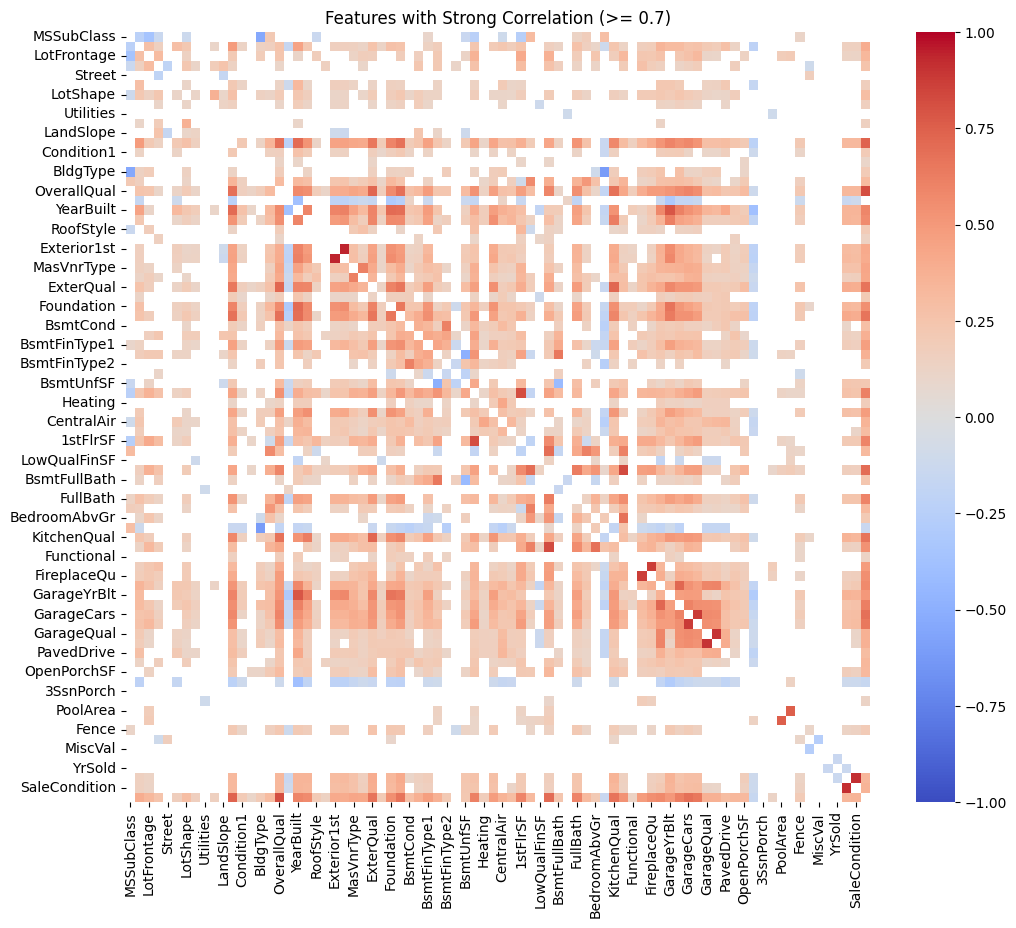

In [87]:
corr_matrix = df_train.corr()

# Filter the correlation matrix based on a threshold, e.g., 0.7
threshold = 0.1
strong_corr = corr_matrix[(np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) != 1)]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Features with Strong Correlation (>= 0.7)")
plt.show()

In [88]:
corr_matrix

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,-0.231056,-0.356828,-0.139781,-0.024969,-0.049369,-0.117358,-0.026108,0.022844,-0.051804,...,0.008283,0.008999,0.115348,0.047032,-0.007683,-0.013585,-0.021407,-0.037595,-0.047872,-0.073959
MSZoning,-0.231056,1.000000,0.274003,0.150836,0.048327,0.281285,0.222236,0.070472,-0.009805,0.102927,...,0.025726,0.020564,0.043271,0.011246,0.002146,0.002714,0.015124,0.152863,0.151476,0.394871
LotFrontage,-0.356828,0.274003,1.000000,0.305194,-0.037343,0.082805,0.146792,0.024335,0.000728,-0.028037,...,0.180839,0.196987,-0.020942,-0.005554,0.000159,0.010366,0.006494,0.126571,0.120805,0.335555
LotArea,-0.139781,0.150836,0.305194,1.000000,-0.197131,0.037533,0.228388,0.113874,-0.010123,0.187235,...,0.077672,0.059508,0.049406,-0.106299,0.038068,0.001205,-0.014261,0.022429,0.032199,0.257320
Street,-0.024969,0.048327,-0.037343,-0.197131,1.000000,-0.013155,-0.005640,0.020130,-0.001682,0.014073,...,0.004413,0.003527,-0.026842,0.164588,-0.022733,0.003690,-0.025043,0.019257,0.011167,0.057369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,0.002714,0.010366,0.001205,0.003690,0.006459,0.031606,0.078606,0.051552,-0.013265,...,-0.033737,-0.029094,-0.010363,-0.012835,-0.006495,1.000000,-0.145721,0.090653,0.075157,0.057329
YrSold,-0.021407,0.015124,0.006494,-0.014261,-0.025043,0.022191,-0.033508,-0.009852,-0.023353,0.009500,...,-0.059689,-0.051382,-0.038219,-0.067411,0.004906,-0.145721,1.000000,-0.138070,-0.098461,-0.037263
SaleType,-0.037595,0.152863,0.126571,0.022429,0.019257,0.049577,0.042349,0.079714,0.035499,-0.020017,...,0.010724,-0.002027,0.128726,0.058164,-0.024255,0.090653,-0.138070,1.000000,0.914876,0.339093
SaleCondition,-0.047872,0.151476,0.120805,0.032199,0.011167,0.054606,0.045289,0.089603,0.044537,-0.023461,...,-0.014294,-0.051488,0.146425,0.047297,-0.015865,0.075157,-0.098461,0.914876,1.000000,0.354066


In [89]:
df_scaled.describe().round(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.87,-3.18,-2.27,-1.12,-21.48,-7.46,-1.07,-4.83,-53.48,-0.51,...,-0.29,-0.06,-0.29,-4.16,-7.49,-0.09,-1.92,-1.36,-1.91,-2.39
25%,-0.87,-0.03,-0.44,-0.34,-0.18,-0.01,-1.07,-0.02,-0.12,-0.51,...,-0.29,-0.06,-0.29,-0.01,-0.02,-0.09,-0.82,-0.60,-0.36,-0.21
50%,-0.17,-0.03,0.00,-0.09,-0.18,-0.01,0.01,0.01,-0.12,0.00,...,-0.29,-0.06,0.22,-0.01,-0.02,-0.09,-0.08,0.16,-0.01,-0.01
75%,0.30,0.56,0.41,0.18,0.27,0.30,0.01,0.01,0.16,0.00,...,-0.29,-0.06,0.22,0.60,0.29,-0.09,0.66,0.92,-0.01,-0.01
max,3.13,2.07,11.44,26.01,0.27,0.30,3.23,5.15,0.16,5.29,...,9.97,22.37,34.71,0.60,2.65,29.88,2.13,1.68,4.61,4.26


## Отбор фичей через catboost

In [90]:
## Отбор фичей catboost 

# df_train['random'] = np.random.uniform(0,100, size=df_train.shape[0])

cb.fit(x_train, y_train)

importances = pd.Series(dict(zip(df_train.columns, cb.feature_importances_))) \
  .sort_values(key=lambda x: abs(x), ascending=False) \
  .round(5)



In [91]:
importances.head(20)

SalePrice        93.08622
OverallQual       1.95089
Neighborhood      1.53698
GarageCars        0.97083
CentralAir        0.71210
GrLivArea         0.62225
GarageType        0.26207
BsmtQual          0.23306
BsmtFinSF1        0.19648
Fireplaces        0.12615
Exterior1st       0.10162
Condition1        0.04094
Foundation        0.03906
FullBath          0.02353
BsmtFinSF2        0.01918
Alley             0.01866
2ndFlrSF          0.01656
GarageCond        0.01338
LotArea           0.01007
SaleCondition     0.00651
dtype: float64

In [92]:
## Отбираем колонки, которые имеют значимость меньше порогового значения

# Set the threshold value
threshold = 0.05

mask = (importances.abs() < threshold)

columns_to_drop = importances.index[mask]

df_filtered_train = x_train.drop(columns_to_drop, axis=1)
df_filtered_valid = x_valid.drop(columns_to_drop, axis=1)


df_filtered_train.shape, y_train.shape, df_filtered_valid.shape, y_valid.shape


((1168, 11), (1168,), (292, 11), (292,))

In [93]:
## Тренируем CB на отфильрованном дата фрейме


cb.fit(df_filtered_train, y_train)

In [94]:
print("train acc:", mean_squared_error(y_train, cb.predict(df_filtered_train), squared=False))
print("valid acc:", mean_squared_error(y_valid, cb.predict(df_filtered_valid), squared=False))

train acc: 0.028817607272493523
valid acc: 0.04106125183598836


In [95]:
## Отбираем колонки для feature engeniring 

df[columns_to_drop].sort_index(axis=1).columns


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond',
       'ExterQual', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageYrBlt', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature',
       'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond', 'PavedDrive',
       'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'Utilities', 'WoodDeckSF', 'Ye

In [96]:
### отбираем фичи, которые не важны, но из которых можно что-то получить

## Объединяю колонки, связанные с PorchSF в одну

porch_columns = df.filter(like='Porch')
porch_columns.describe()

df_fe = pd.DataFrame()

df_fe['AnyPorch'] = porch_columns.sum(axis=1)

## Объдиняем ExteriorQual, Heating 

df_fe['ExterQual_Cond'] = df['ExterQual'] + df['ExterCond']
df_fe['Heating_Cond'] = df['HeatingQC'] + df['Heating']

## Replace outliers

# Calculate the 90th percentile of the 'LotFrontage' column in df
q90 = df['LotFrontage'].quantile(0.90)
# Replace outliers in 'LotFrontage' column with the 90th percentile value
df_fe_LotFrontage = df['LotFrontage'].apply(lambda x: q90 if x > q90 else x)
# Add 'LotFrontage_no_outliers' column to df_fe
df_fe['LotFrontage_no_outliers'] = df_fe_LotFrontage

# Calculate the 90th percentile of the 'LotFrontage' column in df
q90_wd = df['WoodDeckSF'].quantile(0.90)
# Replace outliers in 'LotFrontage' column with the 90th percentile value
df_fe_WoodDeckSF = df['WoodDeckSF'].apply(lambda x: q90_wd if x > q90_wd else x)
# Add 'LotFrontage_no_outliers' column to df_fe
df_fe['WoodDeckSF_no_outliers'] = df_fe_WoodDeckSF



## Преобразовали ремонт basement в одну итгегральную колонку

df_fe['Bsmt_Fin_Tot'] = (df['BsmtFinSF1']*df['BsmtFinType1'] + df['BsmtFinSF2'] * df['BsmtFinType2']) / (df['TotalBsmtSF']* max(df['BsmtFinType1']))

## Собрали все ванные комнаты в одну колонку

df_fe['All_baths'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']


## Кухни

df_fe['Kitchens_Agg'] = df['KitchenAbvGr'] * df['KitchenQual']




In [97]:
df_fe.shape
df_fe.head()


# df_filtered_train_fe = pd.concat([df_filtered_train, df_fe[:ind_train]],axis=1)
# df_filtered_valid_fe = pd.concat([df_filtered_valid, df_fe[ind_train:]],axis=1)


df_fe

df_scaled.shape, df_fe.shape

df_fe_scaled = pd.concat([df_scaled.drop(columns_to_drop, axis=1), df_fe],axis=1)

# df_fe_scaled.drop(['KitchenAbvGr','KitchenQual', 'HalfBath', 'FullBath', 'BsmtHalfBath'])


columns_fe_to_drop = ['KitchenAbvGr', 'KitchenQual', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 
 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'TotalBsmtSF', 'BsmtFinType1', 'KitchenAbvGr', 'KitchenQual', 'WoodDeckSF', 'LotFrontage', 
 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Heating', 'HeatingQC', 'ExterQual', 'ExterCond']

# Convert excluded columns string to a list
excluded_cols = eval("['KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'BsmtHalfBath', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtFinType1', 'KitchenAbvGr', 'WoodDeckSF', 'LotFrontage', 'BsmtHalfBath', 'Heating', 'ExterCond']")

# Define the original list of columns
cols = ['KitchenAbvGr', 'KitchenQual', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'HalfBath', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2', 'BsmtFinType2', 'TotalBsmtSF', 'BsmtFinType1', 'KitchenAbvGr', 'KitchenQual', 'WoodDeckSF', 'LotFrontage', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Heating', 'HeatingQC', 'ExterQual', 'ExterCond']

# Remove excluded columns from the original list
filtered_cols = list(set(cols) - set(excluded_cols))

# Print the filtered list of columns
print(filtered_cols)


df_fe_scaled.drop(filtered_cols, axis=1)


['OpenPorchSF', 'ScreenPorch', 'TotalBsmtSF', 'ExterQual', 'HalfBath', 'HeatingQC', 'KitchenQual', 'FullBath', 'BsmtFinSF1', 'BsmtFullBath']


KeyError: "['OpenPorchSF', 'ScreenPorch', 'TotalBsmtSF', 'ExterQual', 'HalfBath', 'HeatingQC', 'KitchenQual', 'FullBath', 'BsmtFullBath'] not found in axis"

In [98]:
df_fe_scaled

,Neighborhood,OverallQual,Exterior1st,BsmtQual,BsmtFinSF1,CentralAir,GrLivArea,Fireplaces,GarageType,GarageCars,AnyPorch,ExterQual_Cond,Heating_Cond,LotFrontage_no_outliers,WoodDeckSF_no_outliers,Bsmt_Fin_Tot,All_baths,Kitchens_Agg
0,0.721448,0.646183,1.629595,0.828640,0.581145,0.373120,0.413547,-0.924311,0.837935,0.307040,61,24.354360,24.239704,65.0,0.0,0.824766,4.0,12.222337
1,0.477903,-0.063185,-1.524470,0.828640,1.178255,0.373120,-0.471891,0.623632,0.837935,0.307040,0,23.881063,24.239704,80.0,257.0,0.752999,3.0,11.810592
2,0.721448,0.646183,1.629595,0.828640,0.098189,0.373120,0.563755,0.623632,0.837935,0.307040,42,24.354360,24.239704,68.0,0.0,0.528261,4.0,12.222337
3,0.903346,0.646183,-1.718225,-1.157329,-0.494529,0.373120,0.427382,0.623632,-1.612402,1.619264,307,23.881063,23.942448,60.0,0.0,0.277617,2.0,12.222337
4,3.005031,1.355551,1.629595,0.828640,0.469187,0.373120,1.378042,0.623632,0.837935,1.619264,84,24.354360,24.239704,84.0,192.0,0.572052,4.0,12.222337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.000993,-1.481920,-0.027351,-0.009988,-0.968705,-0.000096,-0.807883,-0.924311,-0.009945,-2.317408,0,24.048102,24.048102,21.0,0.0,0.000000,2.0,12.024051
2915,-0.000993,-1.481920,-0.027351,-0.009988,-0.415500,-0.000096,-0.807883,-0.924311,-0.009945,-1.005184,24,24.048102,24.048102,21.0,0.0,0.451113,2.0,12.024051
2916,-0.000993,-0.772552,-0.027351,-0.009988,1.718287,-0.000096,-0.546995,0.623632,-0.009945,0.307040,0,24.048102,24.048102,91.0,257.0,0.977411,2.0,12.024051
2917,-0.000993,-0.772552,-0.027351,-0.009988,-0.228904,-0.000096,-1.049006,-0.924311,-0.009945,-2.317408,32,24.048102,24.048102,62.0,80.0,0.361171,2.0,12.024051


In [99]:
df_fe_scaled_scaled = pd.DataFrame(ss.fit_transform(df_fe_scaled), columns=df_fe_scaled.columns)



df_train_fe = df_fe_scaled_scaled.loc[0:ind_test,:] 
df_test_fe = pd.concat([df['Id'][ind_train:], df_fe_scaled_scaled.loc[ind_train:,:]], axis=1)

x = df_train_fe

df_train_fe.shape, df_test_fe.shape

((1460, 18), (1459, 19))

In [100]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((1168, 18), (1168,), (292, 18), (292,))

In [102]:
cb_2 = CatBoostRegressor(iterations=10000, verbose=False)


cb_2.fit(x_train, y_train)



In [103]:
print("train acc:", mean_squared_error(y_train, cb.predict(x_train), squared=False))
print("valid acc:", mean_squared_error(y_valid, cb.predict(x_valid), squared=False))

CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 10 should be feature with name SalePrice (found AnyPorch).

In [104]:
y_pred_test = cb.predict(df_test_fe.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

submission_cb_final = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
submission_cb_final.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_cb_final.csv', index=False)

CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 10 should be feature with name SalePrice (found AnyPorch).

In [ ]:
submission_cb.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,170016.612262
std,421.321334,43171.239622
min,1461.000000,94759.381178
25%,1825.500000,138604.831776
50%,2190.000000,159315.233388
75%,2554.500000,191875.310073
max,2919.000000,309113.291003


In [ ]:
importance_fe = pd.Series(dict(zip(x_train.columns, cb_2.feature_importances_))) \
  .sort_values(key=lambda x: abs(x), ascending=False) \
  .round(5)

importance_fe

GrLivArea                  15.12888
OverallQual                12.35545
Neighborhood                7.50128
TotalBsmtSF                 5.18360
1stFlrSF                    4.42639
LotArea                     3.87006
All_baths                   3.04690
OverallCond                 2.74263
FireplaceQu                 2.65018
GarageArea                  2.56632
KitchenQual                 2.37020
GarageCars                  2.22512
BsmtFinSF1                  2.17218
CentralAir                  1.95197
YearRemodAdd                1.89678
YearBuilt                   1.79790
ExterQual_Cond              1.73599
BsmtQual                    1.57600
Fireplaces                  1.51400
2ndFlrSF                    1.42764
GarageType                  1.39846
LotFrontage_no_outliers     1.27587
Bsmt_Fin_Tot                1.27431
GarageYrBlt                 1.26714
GarageFinish                1.23783
SaleCondition               1.22827
AnyPorch                    1.22516
ExterQual                   

In [ ]:
importance_fe.head(30)

# importance_fe.tail(30)

for column in df_fe.columns: 
    print(importance_fe.loc[column], column)


1.22516 AnyPorch
1.73599 ExterQual_Cond
0.51262 Heating_Cond
1.27587 LotFrontage_no_outliers
0.63228 WoodDeckSF_no_outliers
1.27431 Bsmt_Fin_Tot
3.0469 All_baths
1.05191 Kitchens_Agg


In [ ]:
df_fe.columns

Index(['AnyPorch', 'ExterQual_Cond', 'Heating_Cond', 'LotFrontage_no_outliers',
       'WoodDeckSF_no_outliers', 'Bsmt_Fin_Tot', 'All_baths', 'Kitchens_Agg'],
      dtype='object')